In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import os

In [2]:
PATH = os.getcwd()
BS = 50
num_classes = 7


In [3]:
PATH

'/media/evgeniy/Seagate Expansion Drive/код/EmotionRecognition'

In [5]:
transform = {
    'train': transforms.Compose([
        transforms.Resize(64),
        transforms.RandomRotation(15),
        transforms.ToTensor()
    ])
}

In [4]:
data = {
    'train': datasets.ImageFolder('image', transform=transform['train']),
}

In [5]:
train_data_size = len(data['train'])
test_data_size = len(data['test'])
valid_data_size = len(data['valid'])

In [6]:
train_data = DataLoader(data['train'], batch_size=BS, shuffle=True, 
                        num_workers=6)
test_data = DataLoader(data['test'], batch_size=BS, shuffle=True, 
                       num_workers=6)
valid_data = DataLoader(data['valid'], batch_size=BS, shuffle=True, 
                        num_workers=6)

In [35]:
device = torch.device('cpu')

In [8]:
# resnet34 = models.resnet34(pretrained=True, progress=True)

In [9]:
# resnet34

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
resnet101.fc = nn.Sequential(
    nn.Linear(2048, 512),
    nn.ReLU(),
    nn.Dropout(.4),
    nn.Linear(512, num_classes),
    nn.LogSoftmax(dim=1)
)

resnet34 = resnet34.to(device)


NameError: name 'resnet34' is not defined

In [25]:
loss_func = nn.NLLLoss()
optimizer = optim.SGD(resnet101.parameters(), lr=1e-3,
                      nesterov=True, momentum=0.25)

In [23]:
resnet101 = models.resnet101(pretrained=True, progress=True)

In [24]:
resnet101.fc = nn.Sequential(
    nn.Linear(2048, 512),
    nn.ReLU(),
    nn.Dropout(.4),
    nn.Linear(512, num_classes),
    nn.LogSoftmax(dim=1)
)

In [30]:
resnet34 = torch.load('resnet34_3')

In [32]:
resnet34.class_to_idx = data['train'].class_to_idx

In [36]:
resnet34.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [31]:
history = []

In [37]:
%%time
for epoch in range(1):
    print("Epoch: {}/{}".format(epoch+1, 1))

    # Set to training mode
    resnet34.train()
#     his.append(acc.item())
    # Loss and Accuracy within the epoch
    train_loss = 0.0
    train_acc = 0.0

    valid_loss = 0.0
    valid_acc = 0.0

    for i, (inputs, labels) in enumerate(train_data):

        inputs = inputs.to(device)
        labels = labels.to(device)

        # Clean existing gradients
        optimizer.zero_grad()

        # Forward pass - compute outputs on input data using the model
        outputs = resnet34(inputs)

        # Compute loss
        loss = loss_func(outputs, labels)

        # Backpropagate the gradients
        loss.backward()

        # Update the parameters
        optimizer.step()

        # Compute the total loss for the batch and add it to train_loss
        train_loss += loss.item() * inputs.size(0)

        # Compute the accuracy
        ret, predictions = torch.max(outputs.data, 1)
        correct_counts = predictions.eq(labels.data.view_as(predictions))

        # Convert correct_counts to float and then compute the mean
        acc = torch.mean(correct_counts.type(torch.FloatTensor))

        # Compute total accuracy in the whole batch and add to train_acc
        train_acc += acc.item() * inputs.size(0)

        print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

Epoch: 1/1
Batch number: 000, Training: Loss: 0.2551, Accuracy: 0.9000
Batch number: 001, Training: Loss: 0.1828, Accuracy: 0.9600
Batch number: 002, Training: Loss: 0.3498, Accuracy: 0.9000
Batch number: 003, Training: Loss: 0.1808, Accuracy: 0.9200
Batch number: 004, Training: Loss: 0.1994, Accuracy: 0.9400
Batch number: 005, Training: Loss: 0.2884, Accuracy: 0.9200
Batch number: 006, Training: Loss: 0.2789, Accuracy: 0.9200
Batch number: 007, Training: Loss: 0.2868, Accuracy: 0.9200
Batch number: 008, Training: Loss: 0.4001, Accuracy: 0.8800
Batch number: 009, Training: Loss: 0.2451, Accuracy: 0.9400
Batch number: 010, Training: Loss: 0.2043, Accuracy: 0.9800
Batch number: 011, Training: Loss: 0.3074, Accuracy: 0.9200
Batch number: 012, Training: Loss: 0.2865, Accuracy: 0.9400
Batch number: 013, Training: Loss: 0.3665, Accuracy: 0.9000
Batch number: 014, Training: Loss: 0.2364, Accuracy: 0.9000
Batch number: 015, Training: Loss: 0.2345, Accuracy: 0.9800
Batch number: 016, Training: 

In [31]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

No handles with labels found to put in legend.


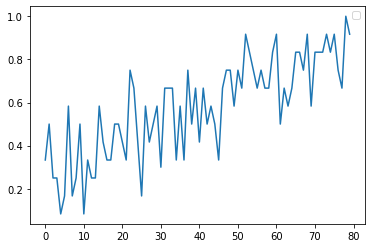

In [41]:
plt.plot(his)
plt.legend()
plt.show()

In [33]:
torch.save(resnet34, 'resnet34_fin')

In [25]:
with torch.no_grad():
 
    # Set to evaluation mode
    resnet34.eval()
 
    # Validation loop
    for j, (inputs, labels) in enumerate(valid_data):
        inputs = inputs.to(device)
        labels = labels.to(device)
 
        # Forward pass - compute outputs on input data using the model
        outputs = resnet34(inputs)
 
        # Compute loss
        loss = loss_func(outputs, labels)
 
        # Compute the total loss for the batch and add it to valid_loss
        valid_loss += loss.item() * inputs.size(0)
 
        # Calculate validation accuracy
        ret, predictions = torch.max(outputs.data, 1)
        correct_counts = predictions.eq(labels.data.view_as(predictions))
 
        # Convert correct_counts to float and then compute the mean
        acc = torch.mean(correct_counts.type(torch.FloatTensor))
 
        # Compute total accuracy in the whole batch and add to valid_acc
        valid_acc += acc.item() * inputs.size(0)
 
        print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
     
# Find average training loss and training accuracy
avg_train_loss = train_loss/train_data_size
avg_train_acc = train_acc/float(train_data_size)
 
# Find average training loss and training accuracy
avg_valid_loss = valid_loss/valid_data_size
avg_valid_acc = valid_acc/float(valid_data_size)
 
history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
         
 
print("Epoch : {:03d}, Training: Loss: {:.4f}, \
Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%,\
".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, 
                      avg_valid_acc*100))

Validation Batch number: 000, Validation: Loss: 1.7158, Accuracy: 0.3600
Validation Batch number: 001, Validation: Loss: 1.7020, Accuracy: 0.3000
Epoch : 009, Training: Loss: 1.1545, Accuracy: 58.8389%, 
		Validation : Loss : 5.1355, Accuracy: 102.8571%,


In [26]:
trainer = create_supervised_trainer(resnet34, optimizer,
                                    loss_func, device=device)

In [27]:
evaluator = create_supervised_evaluator(resnet34, device=device, metrics={
    'accuracy': Accuracy(),
    'nll': Loss(loss_func)
})

In [28]:
@trainer.on(Events.ITERATION_COMPLETED)
def log_training_loss(trainer):
    print(f"Epoch[{trainer.state.epoch}] Loss: {trainer.state.output}")


@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    evaluator.run(train_data)
    metrics = evaluator.state.metrics
    print(f"Training Results - Epoch: {trainer.state.epoch}  \
    Avg accuracy: {metrics['accuracy']} Avg loss: {metrics['nll']}")


@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_results(trainer):
    evaluator.run(valid_data)
    metrics = evaluator.state.metrics
    print(f"Validation Results - Epoch: {trainer.state.epoch} \
     Avg accuracy: {metrics['accuracy']} Avg loss: {metrics['nll']}")

In [29]:
%%time
trainer.run(train_data, max_epochs=5)

Epoch[1] Loss: 1.0817815065383911
Epoch[1] Loss: 1.2974778413772583
Epoch[1] Loss: 1.0173799991607666
Epoch[1] Loss: 1.3856123685836792
Epoch[1] Loss: 1.1279902458190918
Epoch[1] Loss: 1.3473247289657593
Epoch[1] Loss: 0.9862923622131348
Epoch[1] Loss: 1.0291169881820679
Epoch[1] Loss: 1.3244439363479614
Epoch[1] Loss: 1.1804990768432617
Epoch[1] Loss: 1.3402515649795532
Epoch[1] Loss: 1.1243102550506592
Epoch[1] Loss: 1.182692527770996
Epoch[1] Loss: 1.2603952884674072
Epoch[1] Loss: 1.2927770614624023
Epoch[1] Loss: 1.2987306118011475
Epoch[1] Loss: 1.124316692352295
Epoch[1] Loss: 1.0488361120224
Epoch[1] Loss: 0.8671000599861145
Epoch[1] Loss: 1.1770747900009155
Epoch[1] Loss: 1.067082166671753
Epoch[1] Loss: 1.21915864944458
Epoch[1] Loss: 0.990007758140564
Epoch[1] Loss: 1.2378064393997192
Epoch[1] Loss: 0.9518067836761475
Epoch[1] Loss: 1.077283501625061
Epoch[1] Loss: 1.1019188165664673
Epoch[1] Loss: 1.1752203702926636
Epoch[1] Loss: 1.340378761291504
Epoch[1] Loss: 1.03227210

State:
	iteration: 195
	epoch: 5
	epoch_length: 39
	max_epochs: 5
	output: 1.356940746307373
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: 12

In [17]:
torch.save({
    'resnet101': resnet34.state_dict(),
    'optimizer': optimizer.state_dict()
    },
    f'{PATH}/resnet34')

In [18]:
%%time
trainer.run(train_data, max_epochs=100)

Epoch[43] Loss: 0.003811061382293701
Epoch[43] Loss: 0.18583130836486816
Epoch[43] Loss: 0.007884114980697632
Epoch[43] Loss: 0.011762768030166626
Epoch[43] Loss: 0.007486745715141296
Epoch[43] Loss: 0.023989051580429077
Epoch[43] Loss: 0.009007930755615234
Epoch[43] Loss: 0.045586779713630676
Epoch[43] Loss: 0.005712032318115234
Epoch[43] Loss: 0.007774919271469116
Epoch[43] Loss: 0.11189024150371552
Epoch[43] Loss: 0.019476711750030518
Epoch[43] Loss: 0.0076589435338974
Epoch[43] Loss: 0.004034385085105896
Epoch[43] Loss: 0.004237189888954163
Epoch[43] Loss: 0.0041923075914382935
Epoch[43] Loss: 0.0027389079332351685
Epoch[43] Loss: 0.018731504678726196
Epoch[43] Loss: 0.09035556018352509
Epoch[43] Loss: 0.05137135833501816
Epoch[43] Loss: 0.007749393582344055
Epoch[43] Loss: 0.01083354651927948
Epoch[43] Loss: 0.0016209036111831665
Epoch[43] Loss: 0.010196298360824585
Epoch[43] Loss: 0.003902226686477661
Epoch[43] Loss: 0.07697638124227524
Epoch[43] Loss: 0.003788858652114868
Epoch[

Current run is terminating due to exception: .
Engine run is terminating due to exception: .


KeyboardInterrupt: 

In [ ]:
torch.save(resnet34,
    f'{PATH}/resnet34_1')

In [24]:
trainer.run(train_data, max_epochs=100)

Epoch[7] Loss: 0.6600565314292908
Epoch[7] Loss: 0.05696873366832733
Epoch[7] Loss: 0.3519812226295471
Epoch[7] Loss: 0.4575202763080597
Epoch[7] Loss: 0.24591875076293945
Epoch[7] Loss: 0.23707084357738495
Epoch[7] Loss: 0.46361106634140015
Epoch[7] Loss: 0.402351975440979
Epoch[7] Loss: 0.2874239981174469
Epoch[7] Loss: 0.34599876403808594
Epoch[7] Loss: 0.7171586751937866
Epoch[7] Loss: 0.28149551153182983
Epoch[7] Loss: 0.45462095737457275
Epoch[7] Loss: 0.29328253865242004
Epoch[7] Loss: 0.27080458402633667
Epoch[7] Loss: 0.09270523488521576
Epoch[7] Loss: 0.400163471698761
Epoch[7] Loss: 0.2696250081062317
Epoch[7] Loss: 0.25013473629951477
Epoch[7] Loss: 0.2283349633216858
Epoch[7] Loss: 0.31190451979637146
Epoch[7] Loss: 0.3916991651058197
Epoch[7] Loss: 0.3957797586917877
Epoch[7] Loss: 0.2511162757873535
Epoch[7] Loss: 0.2201136350631714
Epoch[7] Loss: 0.23781412839889526
Epoch[7] Loss: 0.30612391233444214
Epoch[7] Loss: 0.296103835105896
Epoch[7] Loss: 0.2787315249443054
Epo

Epoch[11] Loss: 0.43239232897758484
Epoch[11] Loss: 0.183802992105484
Epoch[11] Loss: 0.11893582344055176
Epoch[11] Loss: 0.6563249826431274
Epoch[11] Loss: 0.2344914972782135
Epoch[11] Loss: 0.13182197511196136
Epoch[11] Loss: 0.3911898732185364
Epoch[11] Loss: 0.3828166425228119
Epoch[11] Loss: 0.5033184885978699
Epoch[11] Loss: 0.44583016633987427
Training Results - Epoch: 11      Avg accuracy: 0.9273333333333333 Avg loss: 0.24989605192343395
Validation Results - Epoch: 11      Avg accuracy: 0.9225589225589226 Avg loss: 0.26974760091264643
Epoch[12] Loss: 0.3714364767074585
Epoch[12] Loss: 0.18285608291625977
Epoch[12] Loss: 0.14521992206573486
Epoch[12] Loss: 0.5590334534645081
Epoch[12] Loss: 0.43653902411460876
Epoch[12] Loss: 0.4826205372810364
Epoch[12] Loss: 0.22396765649318695
Epoch[12] Loss: 0.22709128260612488
Epoch[12] Loss: 0.19054800271987915
Epoch[12] Loss: 0.402994841337204
Epoch[12] Loss: 0.40153416991233826
Epoch[12] Loss: 0.3418926000595093
Epoch[12] Loss: 0.4648267

Epoch[16] Loss: 0.2136499583721161
Epoch[16] Loss: 0.1787758469581604
Epoch[16] Loss: 0.31964826583862305
Epoch[16] Loss: 0.24549232423305511
Epoch[16] Loss: 0.3464367091655731
Epoch[16] Loss: 0.22912099957466125
Epoch[16] Loss: 0.2970203161239624
Epoch[16] Loss: 0.24447645246982574
Epoch[16] Loss: 0.3667951226234436
Epoch[16] Loss: 0.27551960945129395
Epoch[16] Loss: 0.15468323230743408
Epoch[16] Loss: 0.33388715982437134
Epoch[16] Loss: 0.6220146417617798
Epoch[16] Loss: 0.32127177715301514
Epoch[16] Loss: 0.19033078849315643
Epoch[16] Loss: 0.33982333540916443
Epoch[16] Loss: 0.28538623452186584
Epoch[16] Loss: 0.5133522152900696
Epoch[16] Loss: 0.25155532360076904
Epoch[16] Loss: 0.1638946235179901
Epoch[16] Loss: 0.4722900986671448
Epoch[16] Loss: 0.26871857047080994
Epoch[16] Loss: 0.31385737657546997
Epoch[16] Loss: 0.16310858726501465
Epoch[16] Loss: 0.5319536328315735
Epoch[16] Loss: 0.35008156299591064
Epoch[16] Loss: 0.5218817591667175
Epoch[16] Loss: 0.2923532724380493
Epoc

Epoch[20] Loss: 0.06656014919281006
Epoch[20] Loss: 0.31869590282440186
Epoch[20] Loss: 0.13513216376304626
Epoch[20] Loss: 0.20831802487373352
Epoch[20] Loss: 0.19994470477104187
Epoch[20] Loss: 0.20981760323047638
Epoch[20] Loss: 0.1479162871837616
Epoch[20] Loss: 0.16692739725112915
Epoch[20] Loss: 0.44087108969688416
Epoch[20] Loss: 0.3257027566432953
Epoch[20] Loss: 0.2049408257007599
Epoch[20] Loss: 0.2959941625595093
Epoch[20] Loss: 0.591494083404541
Epoch[20] Loss: 0.2542203664779663
Epoch[20] Loss: 0.21102206408977509
Epoch[20] Loss: 0.3037240207195282
Epoch[20] Loss: 0.14780288934707642
Epoch[20] Loss: 0.19701874256134033
Epoch[20] Loss: 0.3833559453487396
Epoch[20] Loss: 0.22409047186374664
Training Results - Epoch: 20      Avg accuracy: 0.9186666666666666 Avg loss: 0.24671165267626444
Validation Results - Epoch: 20      Avg accuracy: 0.9057239057239057 Avg loss: 0.2839125065691142
Epoch[21] Loss: 0.20659761130809784
Epoch[21] Loss: 0.6654418110847473
Epoch[21] Loss: 0.40469

Validation Results - Epoch: 24      Avg accuracy: 0.9023569023569024 Avg loss: 0.2763750498945063
Epoch[25] Loss: 0.253757119178772
Epoch[25] Loss: 0.27472516894340515
Epoch[25] Loss: 0.29579317569732666
Epoch[25] Loss: 0.3687126934528351
Epoch[25] Loss: 0.16881795227527618
Epoch[25] Loss: 0.1958083212375641
Epoch[25] Loss: 0.3660332262516022
Epoch[25] Loss: 0.2362867295742035
Epoch[25] Loss: 0.24229297041893005
Epoch[25] Loss: 0.4453273117542267
Epoch[25] Loss: 0.18428705632686615
Epoch[25] Loss: 0.3888663053512573
Epoch[25] Loss: 0.38330376148223877
Epoch[25] Loss: 0.2134227454662323
Epoch[25] Loss: 0.2426822930574417
Epoch[25] Loss: 0.25909584760665894
Epoch[25] Loss: 0.2583329677581787
Epoch[25] Loss: 0.3897686302661896
Epoch[25] Loss: 0.3094560205936432
Epoch[25] Loss: 0.09580239653587341
Epoch[25] Loss: 0.2875731587409973
Epoch[25] Loss: 0.3141641914844513
Epoch[25] Loss: 0.17707301676273346
Epoch[25] Loss: 0.20074188709259033
Epoch[25] Loss: 0.1354796439409256
Epoch[25] Loss: 0.

Epoch[29] Loss: 0.5061146020889282
Epoch[29] Loss: 0.16602221131324768
Epoch[29] Loss: 0.15510408580303192
Epoch[29] Loss: 0.10561282932758331
Epoch[29] Loss: 0.22776439785957336
Epoch[29] Loss: 0.5330411791801453
Epoch[29] Loss: 0.2330559939146042
Epoch[29] Loss: 0.2304699420928955
Epoch[29] Loss: 0.6882466077804565
Epoch[29] Loss: 0.4806562662124634
Epoch[29] Loss: 0.1546216756105423
Epoch[29] Loss: 0.1557958424091339
Epoch[29] Loss: 0.4370015263557434
Epoch[29] Loss: 0.29960325360298157
Epoch[29] Loss: 0.5832122564315796
Epoch[29] Loss: 0.21321099996566772
Epoch[29] Loss: 0.11215807497501373
Epoch[29] Loss: 0.3877201974391937
Epoch[29] Loss: 0.17748835682868958
Epoch[29] Loss: 0.18808218836784363
Epoch[29] Loss: 0.5275797843933105
Epoch[29] Loss: 0.28289029002189636
Epoch[29] Loss: 0.4505458474159241
Epoch[29] Loss: 0.21846464276313782
Epoch[29] Loss: 0.2818896472454071
Epoch[29] Loss: 0.2564638555049896
Epoch[29] Loss: 0.6347087025642395
Training Results - Epoch: 29      Avg accura

Current run is terminating due to exception: .
Engine run is terminating due to exception: .


KeyboardInterrupt: 

In [28]:
torch.save({
    'resnet101': resnet101.state_dict(),
    'optimizer': optimizer.state_dict()
    },
    f'{PATH}/resnet101{month_day_hour_minute}')

In [27]:
resnet34.class_to_idx = data['train'].class_to_idx